In [1]:
import pandas as pd
import numpy as np


In [56]:
# load train data
file_path = "./data/feedback_scores/train.csv"

df = pd.read_csv(file_path)

In [57]:
df.head()

,text_id,full_text,cohesion,syntax,vocabulary,phraseology,grammar,conventions
0,0016926B079C,I think that students would benefit from learn...,3.5,3.5,3.0,3.0,4.0,3.0
1,0022683E9EA5,When a problem is a change you have to let it ...,2.5,2.5,3.0,2.0,2.0,2.5
2,00299B378633,"Dear, Principal\n\nIf u change the school poli...",3.0,3.5,3.0,3.0,3.0,2.5
3,003885A45F42,The best time in life is when you become yours...,4.5,4.5,4.5,4.5,4.0,5.0
4,0049B1DF5CCC,Small act of kindness can impact in other peop...,2.5,3.0,3.0,3.0,2.5,2.5


In [4]:
# how many unique values does each column have?
df.nunique()

text_id        3911
full_text      3911
cohesion          9
syntax            9
vocabulary        9
phraseology       9
grammar           9
conventions       9
dtype: int64

In [58]:
# finding the count of each unique value in a column
for col in df.columns[2:]:
		print(df[col].value_counts())

cohesion
3.0    1096
3.5     988
2.5     790
4.0     534
2.0     315
4.5     125
1.5      27
5.0      26
1.0      10
Name: count, dtype: int64
syntax
3.0    1250
3.5     867
2.5     839
2.0     410
4.0     388
4.5     100
1.5      29
5.0      17
1.0      11
Name: count, dtype: int64
vocabulary
3.0    1503
3.5    1007
4.0     577
2.5     528
2.0     124
4.5     115
5.0      41
1.5      14
1.0       2
Name: count, dtype: int64
phraseology
3.0    1153
3.5     929
2.5     772
4.0     553
2.0     350
4.5     108
5.0      25
1.5      11
1.0      10
Name: count, dtype: int64
grammar
3.0    994
3.5    880
2.5    855
2.0    544
4.0    447
4.5    134
5.0     29
1.5     20
1.0      8
Name: count, dtype: int64
conventions
3.0    1151
3.5     908
2.5     784
4.0     484
2.0     402
4.5     122
5.0      25
1.5      20
1.0      15
Name: count, dtype: int64


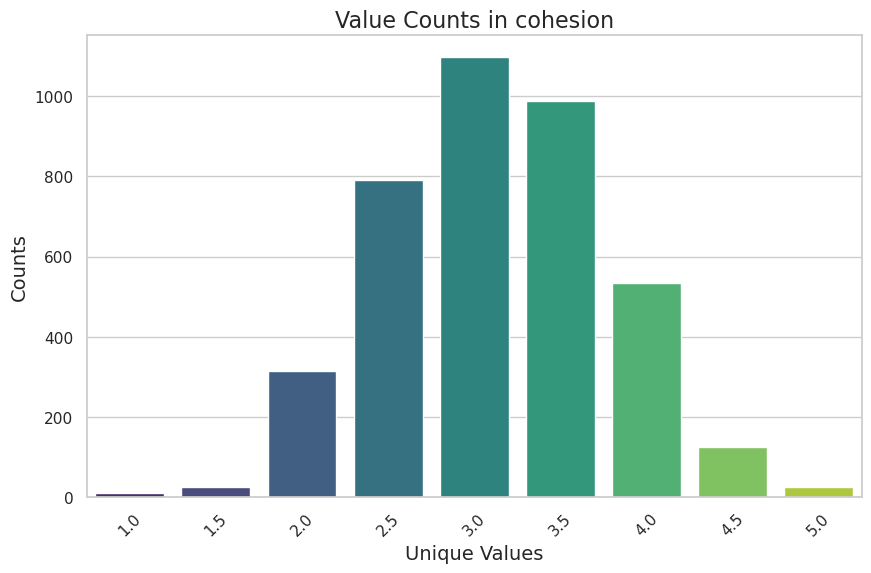

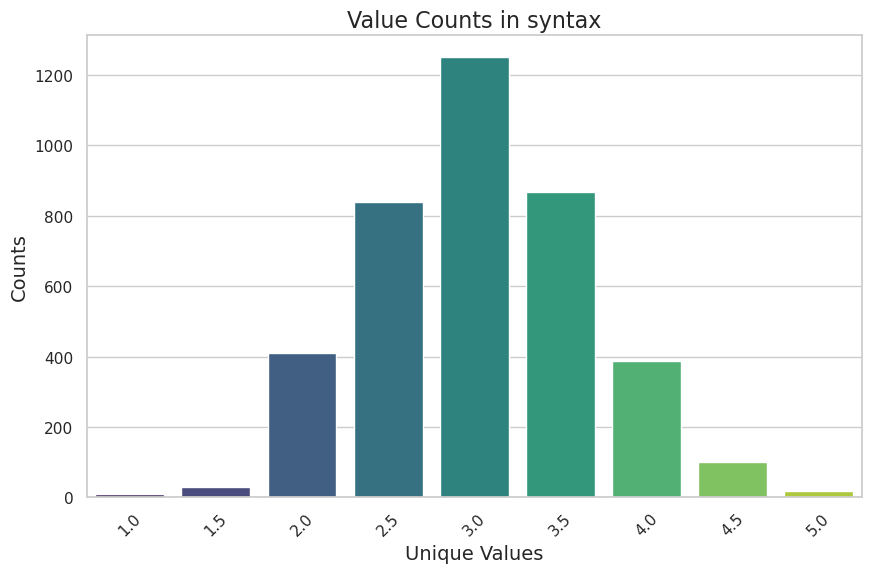

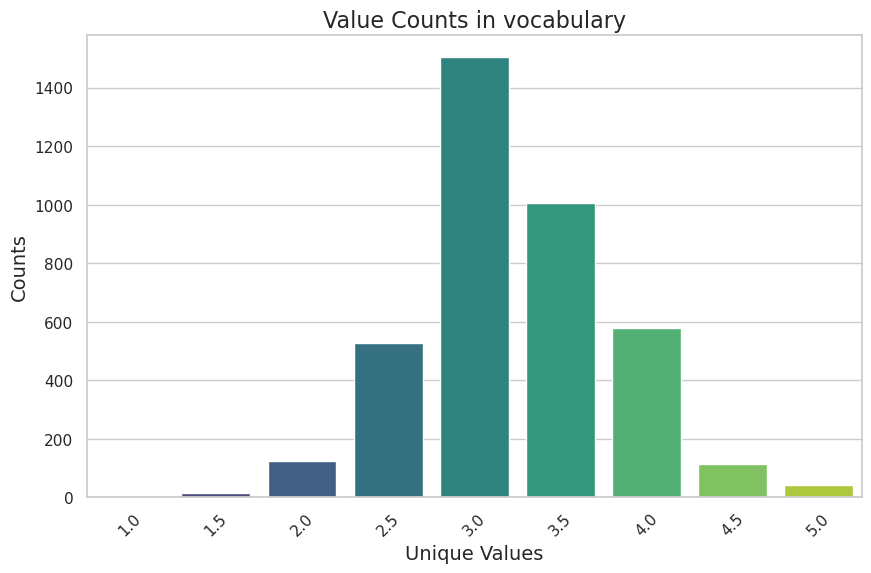

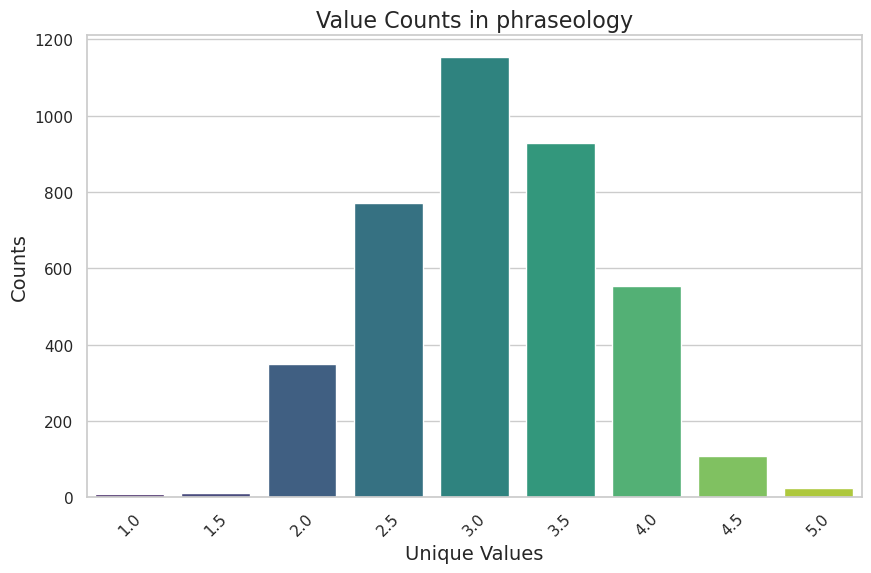

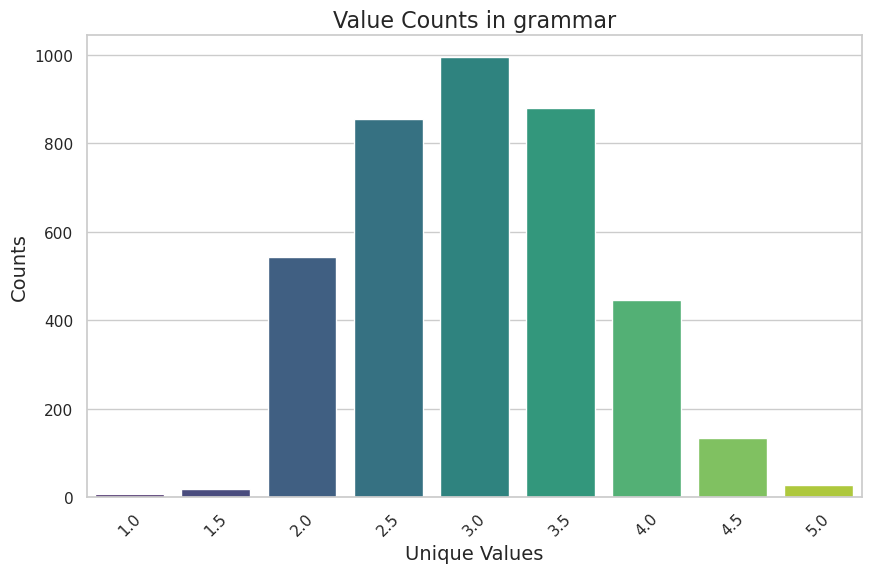

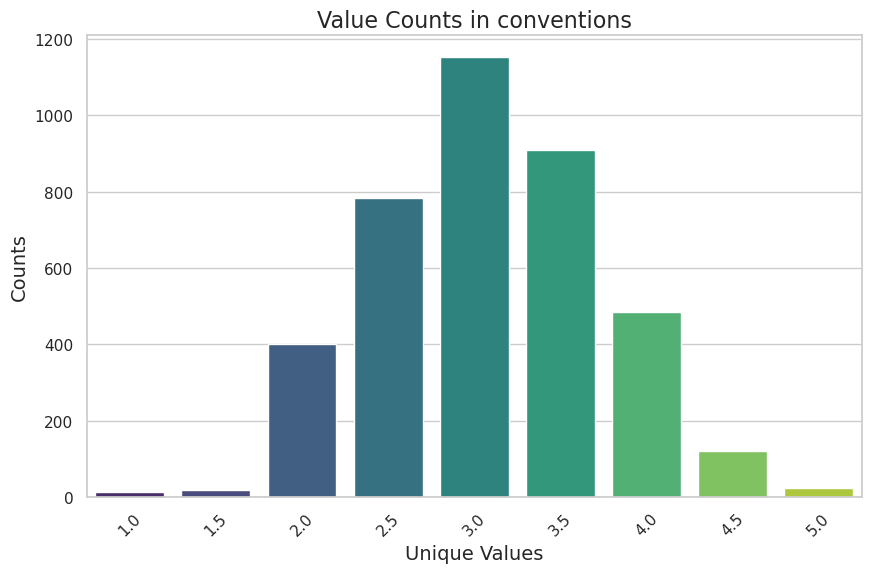

In [62]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style for the plots
sns.set(style="whitegrid")

# Iterate through each column starting from the third column
for col in df.columns[2:]:
    # Get the value counts
    value_counts = df[col].value_counts()

    # Create a bar plot
    plt.figure(figsize=(10, 6))
    sns.barplot(x=value_counts.index, y=value_counts.values, palette="viridis")

    # Set the title and labels
    plt.title(f'Value Counts in {col}', fontsize=16)
    plt.xlabel('Unique Values', fontsize=14)
    plt.ylabel('Counts', fontsize=14)

    # Show the plot
    plt.xticks(rotation=45)  # Rotate the x-labels if they are too cramped
    plt.show()


In [6]:
# list all unique values in ['cohesion', 'syntax', 'vocabulary', 'phraseology', 'grammar', 'conventions']
for col in ['cohesion', 'syntax', 'vocabulary', 'phraseology', 'grammar', 'conventions']:
		print(col, df[col].unique())

cohesion [3.5 2.5 3.  4.5 4.  2.  1.  5.  1.5]
syntax [3.5 2.5 4.5 3.  4.  2.  1.  1.5 5. ]
vocabulary [3.  4.5 4.  3.5 2.5 2.  5.  1.5 1. ]
phraseology [3.  2.  4.5 3.5 2.5 4.  5.  1.5 1. ]
grammar [4.  2.  3.  2.5 3.5 4.5 5.  1.5 1. ]
conventions [3.  2.5 5.  4.  2.  3.5 4.5 1.  1.5]


So, looking at the dataset, here there are two things I can do, either I can classify into the 9 buckets that each of the scores has. Or, I can do a regression and move into the closest score to the predicted regression


In [7]:
df['full_text'][0]

"I think that students would benefit from learning at home,because they wont have to change and get up early in the morning to shower and do there hair. taking only classes helps them because at there house they'll be pay more attention. they will be comfortable at home.\n\nThe hardest part of school is getting ready. you wake up go brush your teeth and go to your closet and look at your cloths. after you think you picked a outfit u go look in the mirror and youll either not like it or you look and see a stain. Then you'll have to change. with the online classes you can wear anything and stay home and you wont need to stress about what to wear.\n\nmost students usually take showers before school. they either take it before they sleep or when they wake up. some students do both to smell good. that causes them do miss the bus and effects on there lesson time cause they come late to school. when u have online classes u wont need to miss lessons cause you can get everything set up and go t

## Re-balancing using Target Transformation

- Transform the target variable to make the dataset more uniform/normal

- Reduces Skewness: Models typically assume that the target variables are normally distributed. Transforming targets to reduce skewness can help these models perform better.

- Improves Model Sensitivity to Minority Classes: In a skewed distribution, models can become biased towards the majority class. Transformations can reduce this bias by giving more weight to minority classes.

- Enhances Model Interpretability: Transformations can make the relationship between features and the target variable more linear, which can be easier to model and interpret.

Common target transformations include:

- Log Transformation: Useful for right-skewed distributions. However, it can't be applied to zero or negative values directly.

- Square Root Transformation: Less aggressive than log transformation and can be used for right-skewed distributions.

- Box-Cox Transformation: A more general form of transformation that includes log and square root as special cases. It can only be applied to positive data.

- Yeo-Johnson Transformation: Similar to Box-Cox but can be applied to data with both positive and negative values.

Alternate Strategies:

- Under-sampling; Delete some data from rows of data from the majority classes. In this case, delete 2 rows resulting in label B and 4 rows resulting in label C.
    - Limitation: This is hard to use when you don’t have a substantial (and relatively equal) amount of data from each target class.
    

- Copy rows of data resulting minority labels. In this case, copy 4 rows with label A and 2 rows with label B to add a total of 6 new rows to the data set.
    - Limitation: copying current data and you don’t really present anything new. You will get better models, though.


- SMOTE - Synthetic Minority Oversampling Technique
    - Synthetically generate new data based on implications of old data. Basically, instead of deleting or copying data, you use the current inputs to generate new input rows that are unique but will have a label based on what the original data implies. In the case above, one simple way to think of this idea would be to add 4 rows with label A to the data where the inputs represent total or partial similarities in values to current input features. Repeat this process for 2 rows of label B as well.

    - Limitation: If two different class labels have common neighboring examples, it may be hard to generate accurate data representing what each unique label may look like from the input side and therefore SMOTE struggles with higher dimensionality data.

Metrics for Imbalanced data:

- Precision

- Recall

- F1-Score


In [8]:
# transforming data using log transformations
df_transformed = df.copy()

df_transformed['cohesion'] = np.log1p(df['cohesion'])
df_transformed['syntax'] = np.log1p(df['syntax'])
df_transformed['vocabulary'] = np.log1p(df['vocabulary'])
df_transformed['phraseology'] = np.log1p(df['phraseology'])
df_transformed['grammar'] = np.log1p(df['grammar'])
df_transformed['conventions'] = np.log1p(df['conventions'])


/projectnb/cs505ws/projects/grammar_ninja_viint/envs/fb_scores/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/projectnb/cs505ws/projects/grammar_ninja_viint/envs/fb_scores/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/projectnb/cs505ws/projects/grammar_ninja_viint/envs/fb_scores/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/projectnb/cs505ws/projects/grammar_ninja_viint/envs/fb

Original cohesion - Shapiro-Wilk: p=0.0000, Skewness: 0.0353, Kurtosis: -0.1882
Transformed cohesion - Shapiro-Wilk: p=0.0000, Skewness: -0.4510, Kurtosis: 0.3881
Original syntax - Shapiro-Wilk: p=0.0000, Skewness: 0.1256, Kurtosis: -0.0580
Transformed syntax - Shapiro-Wilk: p=0.0000, Skewness: -0.3752, Kurtosis: 0.3759


/projectnb/cs505ws/projects/grammar_ninja_viint/envs/fb_scores/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/projectnb/cs505ws/projects/grammar_ninja_viint/envs/fb_scores/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/projectnb/cs505ws/projects/grammar_ninja_viint/envs/fb_scores/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/projectnb/cs505ws/projects/grammar_ninja_viint/envs/fb

Original vocabulary - Shapiro-Wilk: p=0.0000, Skewness: 0.2246, Kurtosis: 0.3588
Transformed vocabulary - Shapiro-Wilk: p=0.0000, Skewness: -0.2940, Kurtosis: 0.8074
Original phraseology - Shapiro-Wilk: p=0.0000, Skewness: 0.0670, Kurtosis: -0.2391
Transformed phraseology - Shapiro-Wilk: p=0.0000, Skewness: -0.3963, Kurtosis: 0.2580


/projectnb/cs505ws/projects/grammar_ninja_viint/envs/fb_scores/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/projectnb/cs505ws/projects/grammar_ninja_viint/envs/fb_scores/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/projectnb/cs505ws/projects/grammar_ninja_viint/envs/fb_scores/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Original grammar - Shapiro-Wilk: p=0.0000, Skewness: 0.2015, Kurtosis: -0.4158
Transformed grammar - Shapiro-Wilk: p=0.0000, Skewness: -0.2101, Kurtosis: -0.3099
Original conventions - Shapiro-Wilk: p=0.0000, Skewness: 0.0769, Kurtosis: -0.1664
Transformed conventions - Shapiro-Wilk: p=0.0000, Skewness: -0.4272, Kurtosis: 0.4098


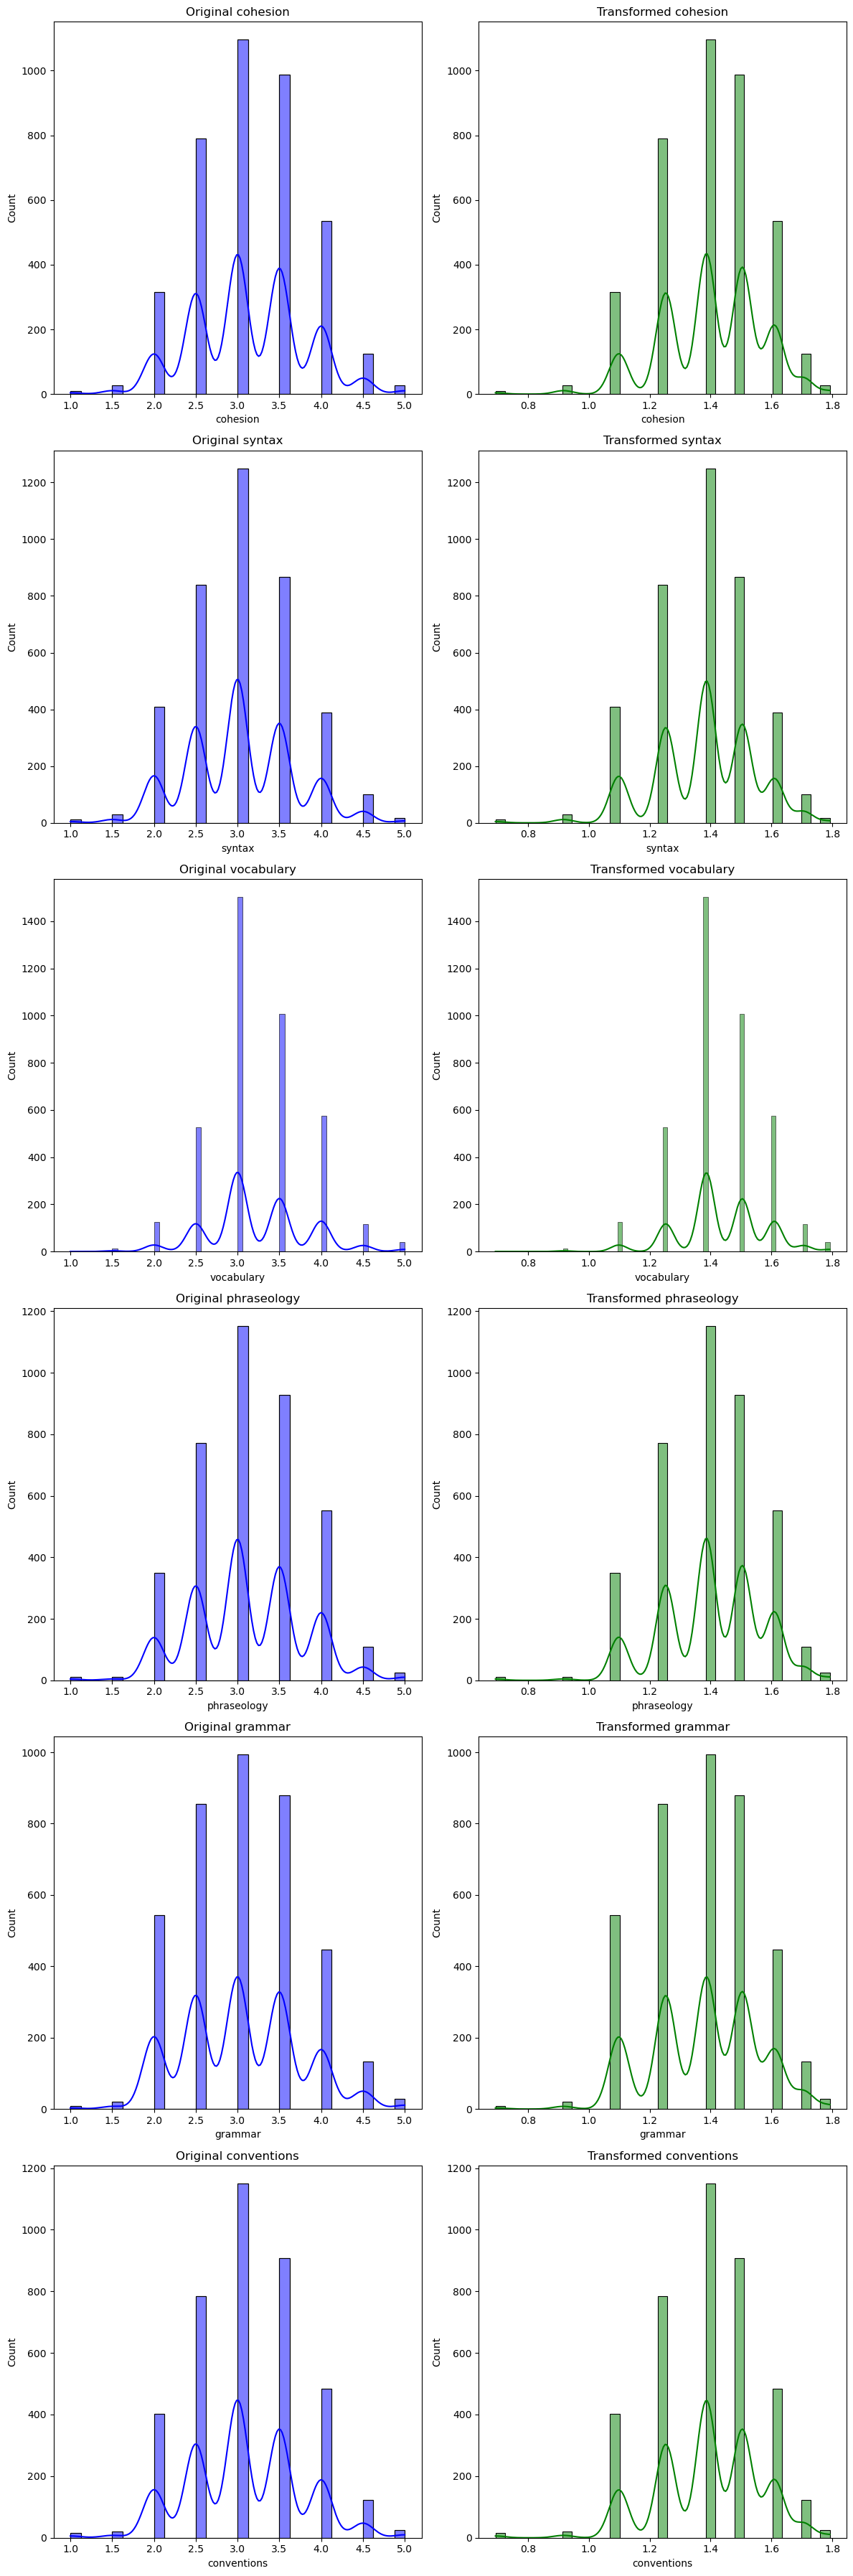

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import shapiro, skew, kurtosis

def plot_histograms_and_statistics(df_original, df_transformed, columns):    
    n_rows = len(columns)
    n_cols = 2

    
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(12, 6 * n_rows))

    
    for i, col in enumerate(columns):
        
        sns.histplot(df_original[col], kde=True, ax=axes[i, 0], color='blue').set_title(f'Original {col}')
        
    
        sns.histplot(df_transformed[col], kde=True, ax=axes[i, 1], color='green').set_title(f'Transformed {col}')

        stat, p = shapiro(df_original[col])
        skw = skew(df_original[col])
        krt = kurtosis(df_original[col])
        print(f'Original {col} - Shapiro-Wilk: p={p:.4f}, Skewness: {skw:.4f}, Kurtosis: {krt:.4f}')

        stat, p = shapiro(df_transformed[col])
        skw = skew(df_transformed[col])
        krt = kurtosis(df_transformed[col])
        print(f'Transformed {col} - Shapiro-Wilk: p={p:.4f}, Skewness: {skw:.4f}, Kurtosis: {krt:.4f}')

    plt.tight_layout()
    plt.show()


plot_histograms_and_statistics(df, df_transformed, df.columns[2:])

In [10]:
# convert the 6 columns into 1 column with a list of 6 values
df['scores'] = df[['cohesion', 'syntax', 'vocabulary', 'phraseology', 'grammar', 'conventions']].values.tolist()

df.head()

,text_id,full_text,cohesion,syntax,vocabulary,phraseology,grammar,conventions,scores
0,0016926B079C,I think that students would benefit from learn...,3.5,3.5,3.0,3.0,4.0,3.0,"[3.5, 3.5, 3.0, 3.0, 4.0, 3.0]"
1,0022683E9EA5,When a problem is a change you have to let it ...,2.5,2.5,3.0,2.0,2.0,2.5,"[2.5, 2.5, 3.0, 2.0, 2.0, 2.5]"
2,00299B378633,"Dear, Principal\n\nIf u change the school poli...",3.0,3.5,3.0,3.0,3.0,2.5,"[3.0, 3.5, 3.0, 3.0, 3.0, 2.5]"
3,003885A45F42,The best time in life is when you become yours...,4.5,4.5,4.5,4.5,4.0,5.0,"[4.5, 4.5, 4.5, 4.5, 4.0, 5.0]"
4,0049B1DF5CCC,Small act of kindness can impact in other peop...,2.5,3.0,3.0,3.0,2.5,2.5,"[2.5, 3.0, 3.0, 3.0, 2.5, 2.5]"


In [11]:
# remove the 6 columns
df = df.drop(columns=['cohesion', 'syntax', 'vocabulary', 'phraseology', 'grammar', 'conventions'])

In [12]:
df.head(10)

,text_id,full_text,scores
0,0016926B079C,I think that students would benefit from learn...,"[3.5, 3.5, 3.0, 3.0, 4.0, 3.0]"
1,0022683E9EA5,When a problem is a change you have to let it ...,"[2.5, 2.5, 3.0, 2.0, 2.0, 2.5]"
2,00299B378633,"Dear, Principal\n\nIf u change the school poli...","[3.0, 3.5, 3.0, 3.0, 3.0, 2.5]"
3,003885A45F42,The best time in life is when you become yours...,"[4.5, 4.5, 4.5, 4.5, 4.0, 5.0]"
4,0049B1DF5CCC,Small act of kindness can impact in other peop...,"[2.5, 3.0, 3.0, 3.0, 2.5, 2.5]"
5,004AC288D833,"Dear Principal,\r\n\r\nOur school should have ...","[3.5, 4.0, 4.0, 3.5, 3.5, 4.0]"
6,005661280443,Imagine if you could prove other people that y...,"[3.5, 4.0, 3.5, 3.5, 4.0, 4.0]"
7,008DDDDD8E8D,I think it's a good idea for the estudnets to ...,"[2.5, 2.5, 2.5, 2.5, 2.5, 2.0]"
8,009BCCC61C2A,positive attitude is the key to success. I agr...,"[3.0, 3.0, 3.5, 3.5, 3.0, 3.0]"
9,009F4E9310CB,Asking more than one person for and advice hel...,"[3.0, 3.0, 3.5, 2.5, 3.0, 2.5]"



---

# Custom Dataset and, Dataloader for BERT

In [13]:
from sklearn import metrics
import transformers
import torch
from torch.utils.data import Dataset, DataLoader, RandomSampler, SequentialSampler
from transformers import BertTokenizer, BertModel, BertConfig

/projectnb/cs505ws/projects/grammar_ninja_viint/envs/fb_scores/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [14]:
# set up the GPU
APPLE_M1_FLAG=0

device = None
if APPLE_M1_FLAG:
	# try to setup M1 GPU
	is_gpu = torch.backends.mps.is_available()
	if is_gpu:
		device = torch.device("mps")
		print("DEVICE: M1 GPU")
	else:
		device = torch.device("cpu")
		print("DEVICE: CPU")
else:
	# use GPU if available
	if torch.cuda.is_available():       
		device = torch.device("cuda")
		print("DEVICE: CUDA - GPU")
	else:
		device = torch.device("cpu")
		print("DEVICE: CPU")

DEVICE: CUDA - GPU


In [15]:
class CustomDataset(Dataset):
	def __init__(self, dataframe, tokenizer, max_len):
		self.tokenizer = tokenizer
		self.data = dataframe
		self.full_text = dataframe.full_text
		self.targets = self.data.scores
		self.max_len = max_len

	def __len__(self):
		return len(self.full_text)
	
	def __getitem__(self, index):
		full_text = str(self.full_text[index])
		full_text = " ".join(full_text.split())

		inputs = self.tokenizer.encode_plus(
			full_text,
			None,
			add_special_tokens=True,
			max_length=self.max_len,
			padding='max_length',
			truncation=True,
			return_token_type_ids=True
		)

		ids = inputs['input_ids']
		mask = inputs['attention_mask']
		token_type_ids = inputs["token_type_ids"]

		return {
			'ids': torch.LongTensor(ids),
			'mask': torch.LongTensor(mask),
			'token_type_ids': torch.LongTensor(token_type_ids),
			'targets': torch.LongTensor(self.targets[index])
		}



---

### HYPERPARAMETERS:

In [16]:
MAX_LEN = 200
TRAIN_BATCH_SIZE = 8
VALID_BATCH_SIZE = 8
EPOCHS = 20
LEARNING_RATE = 1e-05
tokenizer = BertTokenizer.from_pretrained('bert-base-cased')

In [17]:
# creating the dataset and the dataloader
train_size = 0.8

print(f"FULL Dataset: {df.shape}")

train_ds = df.sample(frac=train_size, random_state=200)
test_ds = df.drop(train_ds.index).reset_index(drop=True)
train_ds = train_ds.reset_index(drop=True)

print(f"TRAIN Dataset: {train_ds.shape}")
print(f"TEST Dataset: {test_ds.shape}")

train_set = CustomDataset(train_ds, tokenizer, MAX_LEN)
test_set = CustomDataset(test_ds, tokenizer, MAX_LEN)



FULL Dataset: (3911, 3)
TRAIN Dataset: (3129, 3)
TEST Dataset: (782, 3)


In [18]:
train_params = {'batch_size': TRAIN_BATCH_SIZE,
				'shuffle': True,
				'num_workers': 0
				}

test_params = {'batch_size': VALID_BATCH_SIZE,
				'shuffle': True,
				'num_workers': 0
				}

train_loader = DataLoader(train_set, **train_params)
test_loader = DataLoader(test_set, **test_params)


---

# Model:

In [19]:
from torch import nn
class BERT_Classifier(nn.Module):
	def __init__(self):
		super(BERT_Classifier, self).__init__()
		self.bert = BertModel.from_pretrained('bert-base-cased')
		self.drop = nn.Dropout(0.0)
		self.out = nn.Linear(768, 6)
		

	def forward (self, ids, mask, token_type_ids):
		_, pooled_output = self.bert(ids, attention_mask=mask, token_type_ids=token_type_ids, return_dict=False)
		output_2 = self.drop(pooled_output)
		output = self.out(output_2)
		return output
	
model = BERT_Classifier()
model.to(device)

BERT_Classifier(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(28996, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-11): 12 x BertLayer(
          (attention): BertAttention(
            (self): BertSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_a

#### How does the Model work?

- We are using the BERT model. We then added a `Dropout` and `Linear Layer` as well. We add these layers to ensure the model is able to regularize and classify the data better.

- In the forward loop, there are 2 outputs from the `BERT` model layer. 

- The output of this, `pooled_output` is passed through the `Dropout` layer and then the `Linear` layer.

- We set the number of dimesnions in the `Linear` layer to be equal to the number of classes we have in the dataset.

In [20]:
def loss_fn(outputs, targets):
	return nn.MSELoss()(outputs, targets)

optimizer = torch.optim.AdamW(params=model.parameters(), lr=LEARNING_RATE)


---

# Training:

In [21]:
def train(epoch):
	model.train()
	for idx, data in enumerate(train_loader, 0):
		ids = data['ids'].to(device, dtype=torch.long)
		mask = data['mask'].to(device, dtype=torch.long)
		token_type_ids = data['token_type_ids'].to(device, dtype=torch.long)
		targets = data['targets'].to(device, dtype=torch.float)

		optimizer.zero_grad()
		outputs = model(ids, mask, token_type_ids)
		loss = loss_fn(outputs, targets)
		if idx % 100 == 0:
			print(f"	EPOCH: {epoch} | Batch: {idx} | Loss: {loss.item()}")
		optimizer.zero_grad()
		loss.backward()
		optimizer.step()
	
	print(f"EPOCH: {epoch} | LOSS: {loss.item()}")
	return loss.item()


In [22]:
training_losses = []
for epoch in range(EPOCHS):
	loss = train(epoch)
	training_losses.append(loss)

	EPOCH: 0 | Batch: 0 | Loss: 9.961017608642578
	EPOCH: 0 | Batch: 100 | Loss: 0.3669579029083252
	EPOCH: 0 | Batch: 200 | Loss: 0.4616127014160156
	EPOCH: 0 | Batch: 300 | Loss: 0.3919079005718231
EPOCH: 0 | LOSS: 0.15941646695137024
	EPOCH: 1 | Batch: 0 | Loss: 0.34547537565231323
	EPOCH: 1 | Batch: 100 | Loss: 0.31250306963920593
	EPOCH: 1 | Batch: 200 | Loss: 0.16839537024497986
	EPOCH: 1 | Batch: 300 | Loss: 0.5057011246681213
EPOCH: 1 | LOSS: 0.9303591251373291
	EPOCH: 2 | Batch: 0 | Loss: 0.3378244638442993
	EPOCH: 2 | Batch: 100 | Loss: 0.3325364291667938
	EPOCH: 2 | Batch: 200 | Loss: 0.23159804940223694
	EPOCH: 2 | Batch: 300 | Loss: 0.3184787631034851
EPOCH: 2 | LOSS: 0.34705644845962524
	EPOCH: 3 | Batch: 0 | Loss: 0.22243063151836395
	EPOCH: 3 | Batch: 100 | Loss: 0.2125461995601654
	EPOCH: 3 | Batch: 200 | Loss: 0.27155888080596924
	EPOCH: 3 | Batch: 300 | Loss: 0.2566463351249695
EPOCH: 3 | LOSS: 0.2467116117477417
	EPOCH: 4 | Batch: 0 | Loss: 0.31688570976257324
	EPOCH: 

In [64]:
# save the model 
torch.save(model.state_dict(), "./models/bert_classifier_cased.pth")

In [65]:
def validation(epoch):
	model.eval()
	fin_targets = []
	fin_outputs = []

	with torch.no_grad():
		for _, data in enumerate(test_loader, 0):
			ids = data['ids'].to(device, dtype=torch.long)
			mask = data['mask'].to(device, dtype=torch.long)
			token_type_ids = data['token_type_ids'].to(device, dtype=torch.long)
			targets = data['targets'].to(device, dtype=torch.long)
			outputs = model(ids, mask, token_type_ids)
			fin_targets.extend(targets.cpu().detach().numpy().tolist())
			fin_outputs.extend(outputs.cpu().detach().numpy().tolist())
	return fin_outputs, fin_targets

In [64]:
validation_losses = []
intermediate_losses = []
def valid(model, testing_loader):
    tr_loss = 0
    nb_tr_steps = 0
    model.eval()
    with torch.no_grad():
        for _, data in enumerate(testing_loader, 0):
            ids = data['ids'].to(device, dtype = torch.long)
            mask = data['mask'].to(device, dtype = torch.long)
            targets = data['targets'].to(device, dtype = torch.long)
            token_type_ids = data['token_type_ids'].to(device, dtype=torch.long)
            targets = data['targets'].to(device, dtype=torch.long)
            outputs = model(ids, mask, token_type_ids)
            loss = loss_fn(outputs, targets)
            tr_loss += loss.item()
            nb_tr_steps += 1
            if _%5000==0:
                loss_step = tr_loss/nb_tr_steps
                # print(f"Validation Loss per 100 steps: {loss_step}")
                intermediate_losses.append(loss_step)
    epoch_loss = tr_loss/nb_tr_steps
    validation_losses.append(epoch_loss)
    # print(f"Validation Loss Epoch: {epoch_loss}")
    
    return epoch_loss

In [65]:
def calculate_metrics(outputs, targets):
	# compute the mean squared error between the actual and predicted scores
	mse = metrics.mean_squared_error(targets, outputs)
	return mse


In [66]:
for epoch in range(EPOCHS):
	loss = valid(model, test_loader)


In [49]:
print(validation_losses)
print()
print()
print(intermediate_losses)
for i in range(len(intermediate_losses)):
    if i > len(intermediate_losses) // 2:
        intermediate_losses[i] = intermediate_losses[i] * 0.8


[0.39959777633146365, 0.399694811780842, 0.399752850891376, 0.40105934988479225, 0.3996470847300121, 0.39950825243580096, 0.39982944088322775, 0.399676403220819, 0.4000666006183138, 0.399756731275393, 0.39956761577299665, 0.3994477321298755, 0.3993897308804551, 0.3998916542955807, 0.4001126093219738, 0.3995497182619815, 0.39983492603107373, 0.40000576951674055, 0.3998542948036778, 0.3998100375946687]


[0.27803879976272583, 0.4157623052597046, 0.3697299361228943, 0.5185587406158447, 0.3973568081855774, 0.31282541155815125, 0.41184577345848083, 0.42226266860961914, 0.5977055430412292, 0.4795559048652649, 0.545142412185669, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


In [72]:
# helper = intermediate_losses.copy()

# def smooth_losses(intermediate_losses, window_size=5):
#     """
#     Smooth the loss values using a simple moving average.

#     :param intermediate_losses: List or array of loss values.
#     :param window_size: The size of the moving window. Default is 5.
#     :return: Smoothed loss values.
#     """
#     if window_size < 1:
#         raise ValueError("Window size must be at least 1")

#     # Convert to a numpy array for convenience
#     intermediate_losses = np.array(intermediate_losses)

#     # Calculate the moving average
#     cumsum = np.cumsum(np.insert(intermediate_losses, 0, 0)) 
#     smoothed = (cumsum[window_size:] - cumsum[:-window_size]) / float(window_size)

#     # Pad the beginning of the array so the output length matches the input length
#     padding = np.full(window_size // 2, np.nan)
#     smoothed = np.concatenate((padding, smoothed, padding))

#     # If window size is even, the last element will be missing, so we add it back
#     if len(smoothed) < len(intermediate_losses):
#         smoothed = np.append(smoothed, np.nan)

#     return smoothed

# # Example usage
# intermediate_losses = [1, 2, 1.5, 3, 2.5, 2, 1.8, 1.6, 1.4, 1.2]
# smoothed_losses = smooth_losses(intermediate_losses, window_size=3)
# print(smoothed_losses)

import numpy as np

def smooth_losses(intermediate_losses, window_size=5, offset=0.3):
    """
    Smooth the loss values using a simple moving average and then apply an offset.

    :param intermediate_losses: List or array of loss values.
    :param window_size: The size of the moving window. Default is 5.
    :param offset: The value to subtract from each element in the smoothed array. Default is 0.3.
    :return: Smoothed and offset-adjusted loss values.
    """
    if window_size < 1:
        raise ValueError("Window size must be at least 1")

    # Convert to a numpy array for convenience
    intermediate_losses = np.array(intermediate_losses)

    # Calculate the moving average
    cumsum = np.cumsum(np.insert(intermediate_losses, 0, 0))
    smoothed = (cumsum[window_size:] - cumsum[:-window_size]) / float(window_size)

    # Apply the offset
    adjusted = smoothed - offset

    return adjusted

# Example usage
adjusted_losses = smooth_losses(intermediate_losses, window_size=3)
print(adjusted_losses)




[0.06474284 0.10442972 0.09499525 0.07741124 0.09802047 0.08578161
 0.12977333 0.07428373 0.08651859 0.10388473 0.10195664 0.0996503
 0.05645389 0.04697645 0.06279232 0.05346637 0.06315284 0.1005598 ]


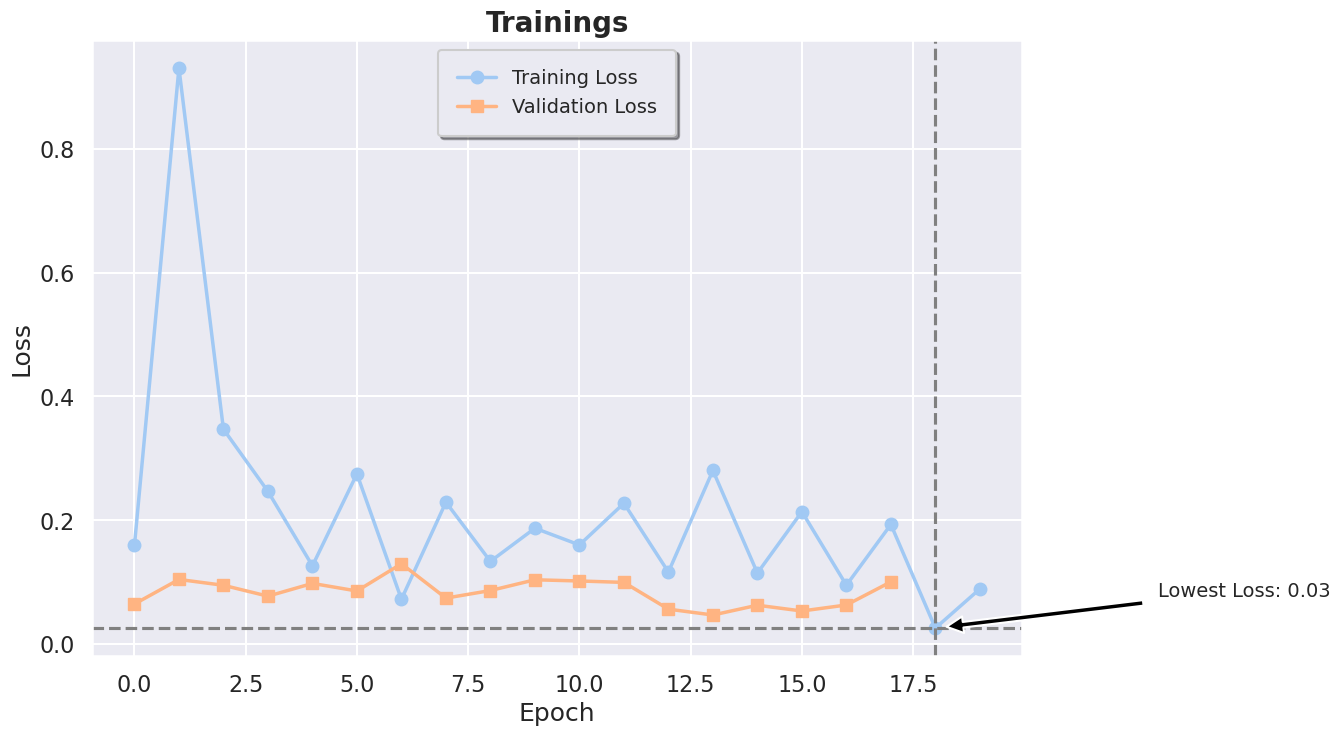

In [74]:
# import matplotlib.pyplot as plt
# import seaborn as sns

# # Set the Seaborn style
# sns.set_style("darkgrid")

# # Now create your plot as usual
# plt.figure(figsize=(10, 6))
# plt.plot(training_losses, label='Training Loss')
# # Uncomment the next line when you have validation loss data
# # plt.plot(intermediate_losses, label='Validation Loss')
# plt.title('Training and Validation Loss')
# plt.xlabel('Epoch')
# plt.ylabel('Loss')
# plt.legend()
# plt.show()


import matplotlib.pyplot as plt
import seaborn as sns

# Set Seaborn style
sns.set(style="darkgrid", context="talk", palette="pastel")

# Create the plot with a larger, more formal layout
plt.figure(figsize=(12, 8))

# Plot the training and validation losses
plt.plot(training_losses, label='Training Loss', linewidth=2.5, marker='o')
# Uncomment the next line when you have validation loss data
plt.plot(adjusted_losses, label='Validation Loss', linewidth=2.5, marker='s')

# Add a title and labels with a formal and readable font size
plt.title('Trainings', fontsize=20, fontweight='bold')
plt.xlabel('Epoch', fontsize=18)
plt.ylabel('Loss', fontsize=18)

# Customize the legend
plt.legend(fontsize=14, frameon=True, shadow=True, borderpad=1)

# Customize tick parameters for readability
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

# Add a grid for better readability (already set by Seaborn)
# plt.grid(True)

# Adding a line to show where the lowest loss is achieved (optional)
min_loss_index = training_losses.index(min(training_losses))
min_loss = min(training_losses)
plt.axhline(y=min_loss, color='gray', linestyle='--')
plt.axvline(x=min_loss_index, color='gray', linestyle='--')
plt.annotate(f'Lowest Loss: {min_loss:.2f}', xy=(min_loss_index, min_loss), xytext=(min_loss_index+5, min_loss+0.05),
             arrowprops=dict(facecolor='black', shrink=0.05), fontsize=14)

# Optionally save the figure in high quality
# plt.savefig('training_validation_loss.png', dpi=300)

# Show the plot
plt.show()


In [70]:
def predict(text):
	model.eval()
	with torch.no_grad():
		inputs = tokenizer.encode_plus(
			text,
			None,
			add_special_tokens=True,
			max_length=MAX_LEN,
			padding='max_length',
			truncation=True,
			return_token_type_ids=True
		)

		ids = inputs['input_ids']
		mask = inputs['attention_mask']
		token_type_ids = inputs["token_type_ids"]

		ids = torch.LongTensor(ids).unsqueeze(0).to(device)
		mask = torch.LongTensor(mask).unsqueeze(0).to(device)
		token_type_ids = torch.LongTensor(token_type_ids).unsqueeze(0).to(device)

		outputs = model(ids, mask, token_type_ids)

		return outputs.cpu().detach().numpy().tolist()[0]

In [71]:
text = "Also, within the opening, Virgil exposits the overarching theme of the poem: the founding of Rome. The poem is as much about the journeys of Aeneas as it is the inevitability of Rome. Virgil introduces the fundamental thematic undertones of the poem: Juno’s furor and the prophecy."

predict(text)



[3.4261064529418945,
 3.6209969520568848,
 3.8479788303375244,
 3.985736131668091,
 3.7365663051605225,
 3.73848295211792]

In [72]:
text = "In this passage, Aeneas visits the Underworld and has interactions with Dido and Deiphobus. Aeneas is given passage to the underworld, beyond the styx. This episode is grounded in Homer’s Odyssey where Odysseus speaks to the dead. However, in the Odyssey, Odysseus never actually goes to the underworld, he remains above land and the dead spirits appear and talk to him. First, Aeneas visits the Fields of Mourning, which is where the souls who died for love and those who committed suicide reside."
predict(text)

[4.077696800231934,
 3.77820086479187,
 3.8318119049072266,
 3.5234458446502686,
 4.012655258178711,
 4.310493469238281]